In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# This data was customised in Excel(more on this in my report)
df = pd.read_excel('intern_data2.xlsx', sheet_name='Sheet1')
df.head()

,0,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transport and storage,Accommodation and food services,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers; undifferentiated goods and services-producing activities of households for own use,Consumer expenditure,Total_per_Year
0,1990,54667.9,46561.7,180059.7,217166.6,67600.2,9499.0,11683.0,65461.7,2776.2,...,2468.4,2651.2,11052.7,5499.6,5756.9,2324.9,1056.4,58.1,142316.6,830696.6
1,1991,54356.7,47082.0,181189.9,213890.9,69114.7,9476.0,12069.7,65977.1,3229.6,...,2680.2,2801.0,10359.0,5827.4,6081.8,2386.7,1161.8,58.5,150965.6,840936.5
2,1992,53949.2,47618.5,174062.0,201849.5,69347.9,9590.9,11890.2,67046.8,3027.2,...,2602.8,2782.2,10504.4,5970.6,6443.9,2031.1,1130.0,59.9,149142.6,821213.1
3,1993,53149.4,47244.1,168507.4,184355.7,69583.6,9737.5,12145.5,68347.1,3219.0,...,2498.9,2878.9,10722.7,5072.5,6126.7,2191.2,1184.9,61.2,154158.6,803452.2
4,1994,54274.5,42960.3,170908.6,180890.8,69818.8,10194.3,12536.3,69241.2,3206.1,...,2555.4,2980.9,10068.0,4534.3,6197.4,2133.4,1184.8,64.5,149261.7,795337.3


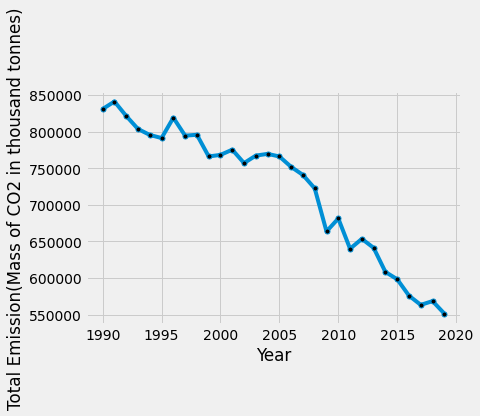

In [2]:
# Ploting year column against total GHG emission of all industry section and groups
plt.style.use('fivethirtyeight')
plt.plot(df[0], df['Total_per_Year'], marker='o', markersize=5, mfc='black')
plt.xlabel('Year')
plt.ylabel('Total Emission(Mass of CO2 in thousand tonnes)')
plt.show()

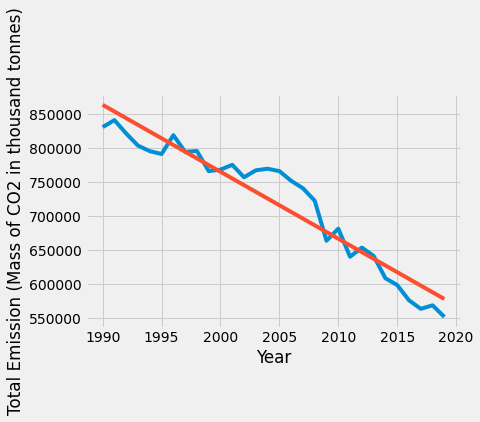

In [3]:
# Fitting regression line
x = np.array(df[0])
y = np.array(df['Total_per_Year'])
m, b = np.polyfit(x, y, 1)
plt.plot(df[0], df['Total_per_Year'])
plt.plot(x, m*x+b)
plt.xlabel('Year')
plt.ylabel('Total Emission (Mass of CO2 in thousand tonnes)')
plt.show()

In [4]:
print('Therefore in five years(2024), total emission = ', (m*2024 + b).round())
print('Estimated year where the GHG emission will be 0 = ', (-b/m).round())

Therefore in five years(2024), total emission =  528671.0
Estimated year where the GHG emission will be 0 =  2078.0


In [5]:
# Chi-Squared test
observed = np.array(df['Total_per_Year'])
expected = [(m*x + b) for x in range(1990, 2020, 1)]

chi_squared = (((observed-expected)**2)/expected).sum()
print('The Value of Chi Square = ', chi_squared.round())

The Value of Chi Square =  28962.0


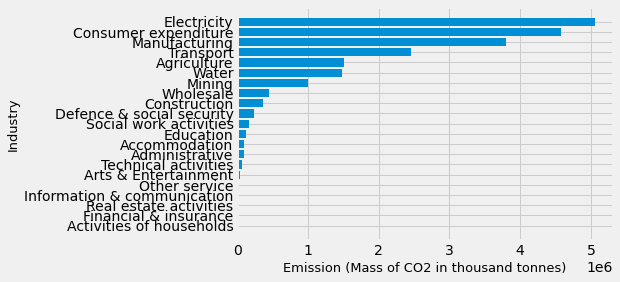

In [6]:
# Each industry vs their emission
each_industry_total = list(df.sum()[1:-1].sort_values(ascending=True))
each_industry = ['Activities of households', 'Financial & insurance', 'Real estate activities', 'Information & communication', 
                 'Other service', 'Arts & Entertainment', 'Technical activities', 'Administrative', 'Accommodation', 'Education',
                 'Social work activities', 'Defence & social security', 'Construction', 'Wholesale', 'Mining', 'Water',
                'Agriculture', 'Transport', 'Manufacturing', 'Consumer expenditure', 'Electricity']

plt.barh(each_industry, each_industry_total, )
plt.xlabel('Emission (Mass of CO2 in thousand tonnes)', fontsize=13)
plt.ylabel('Industry', fontsize=13)
plt.show()

In [7]:
df2 = pd.read_excel('intern_data2.xlsx', sheet_name='Sheet2')
df2.head()

,Year,Total CO2 emissions,Total CH4 emissions,Total N2O emissions,Total HFC emissions,Total PFC emissions,Total NF3 emissions,Total SF6 emissions
0,1990,637165.2,129180.0,46984.8,14399.5,1651.4,0.4,1315.5
1,1991,646096.2,129895.9,47192.9,15008.5,1385.0,0.5,1357.5
2,1992,631454.6,129735.0,42306.8,15625.8,690.2,0.5,1399.9
3,1993,618872.8,128243.0,38106.7,16399.5,602.6,0.6,1227.1
4,1994,616015.1,121383.3,38755.8,17301.0,611.2,0.7,1270.2


Text(0, 0.5, 'Emission (Mass of CO2 in thousand tonnes)')

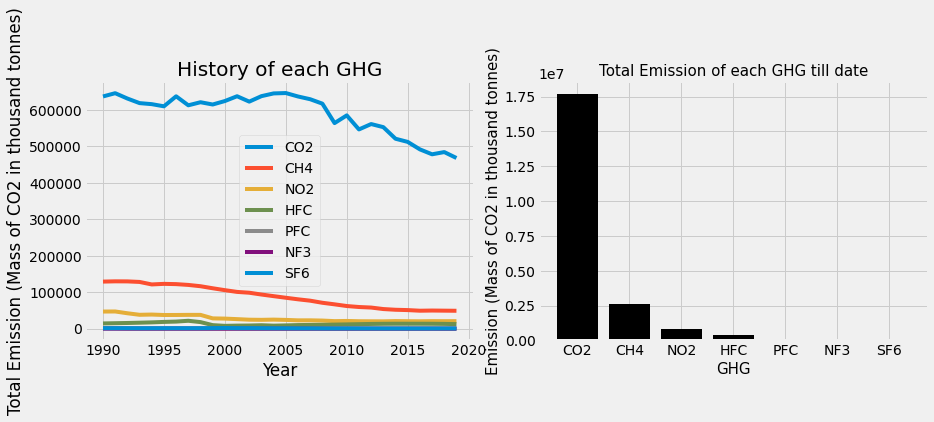

In [8]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes2 = fig.add_axes([1.15,0.1,0.9,0.9])

for i in df2.columns[1:]:
    axes1.plot(df2['Year'], df2[i])
axes1.legend(labels=['CO2', 'CH4', 'NO2', 'HFC', 'PFC', 'NF3', 'SF6'])
axes1.set_xlabel('Year')
axes1.set_ylabel('Total Emission (Mass of CO2 in thousand tonnes)')
axes1.set_title('History of each GHG')

GHG=['CO2', 'CH4', 'NO2', 'HFC', 'PFC', 'NF3', 'SF6']
each_GHG_total = list(df2.sum()[1:])

axes2.bar(GHG, each_GHG_total, color='black')#444444
axes2.set_title('Total Emission of each GHG till date', fontsize=15)
axes2.set_xlabel('GHG', fontsize=15)
axes2.set_ylabel('Emission (Mass of CO2 in thousand tonnes)', fontsize=15)